In [4]:
import pickle
import datetime as dt
import matplotlib.pyplot as plt
import calendar
import collections
import numpy as np
import pandas as pd

# load your dataset here! it should be formatted as this notebook assumes, 
# and things should run without too much wrangling on your part!
d = pickle.load(open('reddit_info_dict_final.pkl', 'rb'))

In [5]:
# unpacking the data we saved earlier
dt_created = d['dt_created']
authors = d['authors']
num_comments_all = d['num_comments_all']
upvote_ratios = d['upvote_ratios']
scores = d['scores']
titles = d['titles']
texts = d['texts']
comment_texts_all = d['comment_texts_all']
comment_authors_all = d['comment_authors_all']

In [6]:
# let's look at posting over time! 

# convert to a python datetime object
ts_created = [dt.datetime.fromtimestamp(d) for d in dt_created]

# get the minimum timestamp, so we can track days since the beginning of the dataset
min_ts = min(ts_created)

# this is a list of days since the beginning of the dataset
ts_created_days = [(d - min_ts).days for d in ts_created]

(array([25., 26., 67., 70., 55., 32., 40.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

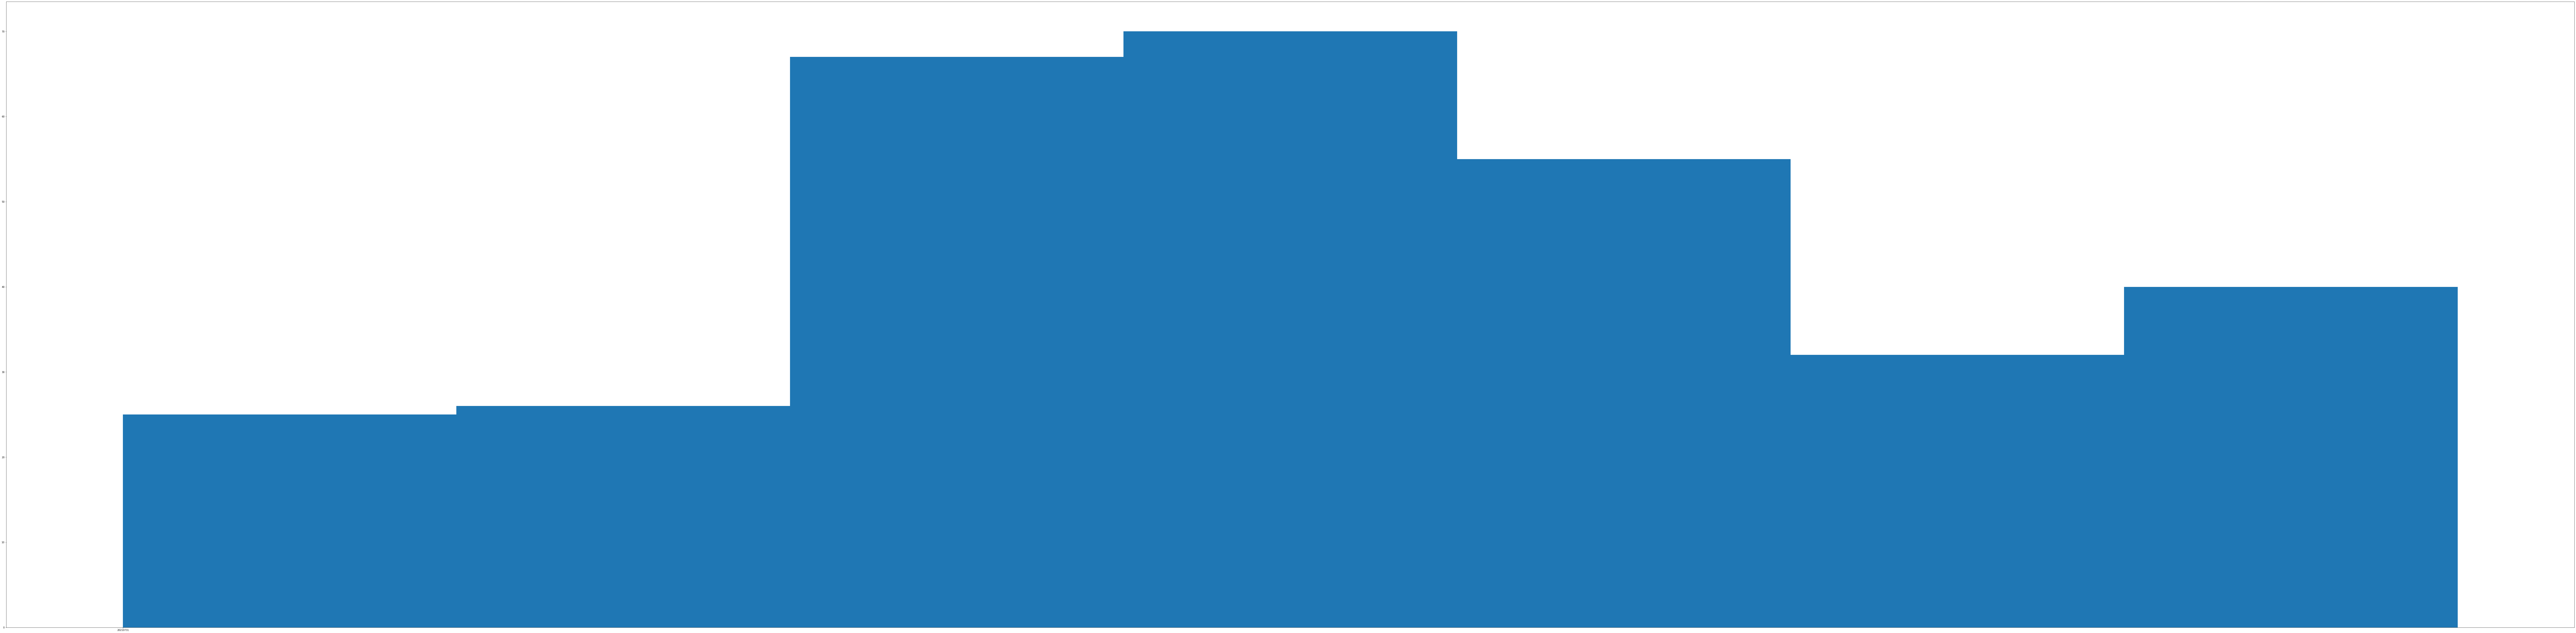

In [7]:
# now we want the range of days so that we can make a proper histogram.
range_of_days = max(ts_created_days) - min(ts_created_days)

# make this larger - it's going to be a big timeline!
plt.rcParams["figure.figsize"] = (200,50)

# how does posting change over time? let's take a look:
plt.xticks(ticks=[r for r in range(range_of_days)][::10], labels=[dt.datetime.strftime((min_ts + dt.timedelta(days=r)), '%Y%m%d') for r in range(range_of_days)][::20])

plt.hist(ts_created_days, bins=range_of_days)

# absent some context or aggregation of data, this likely doesn't really show much!


(array([30., 67., 75., 48., 33., 29., 33.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

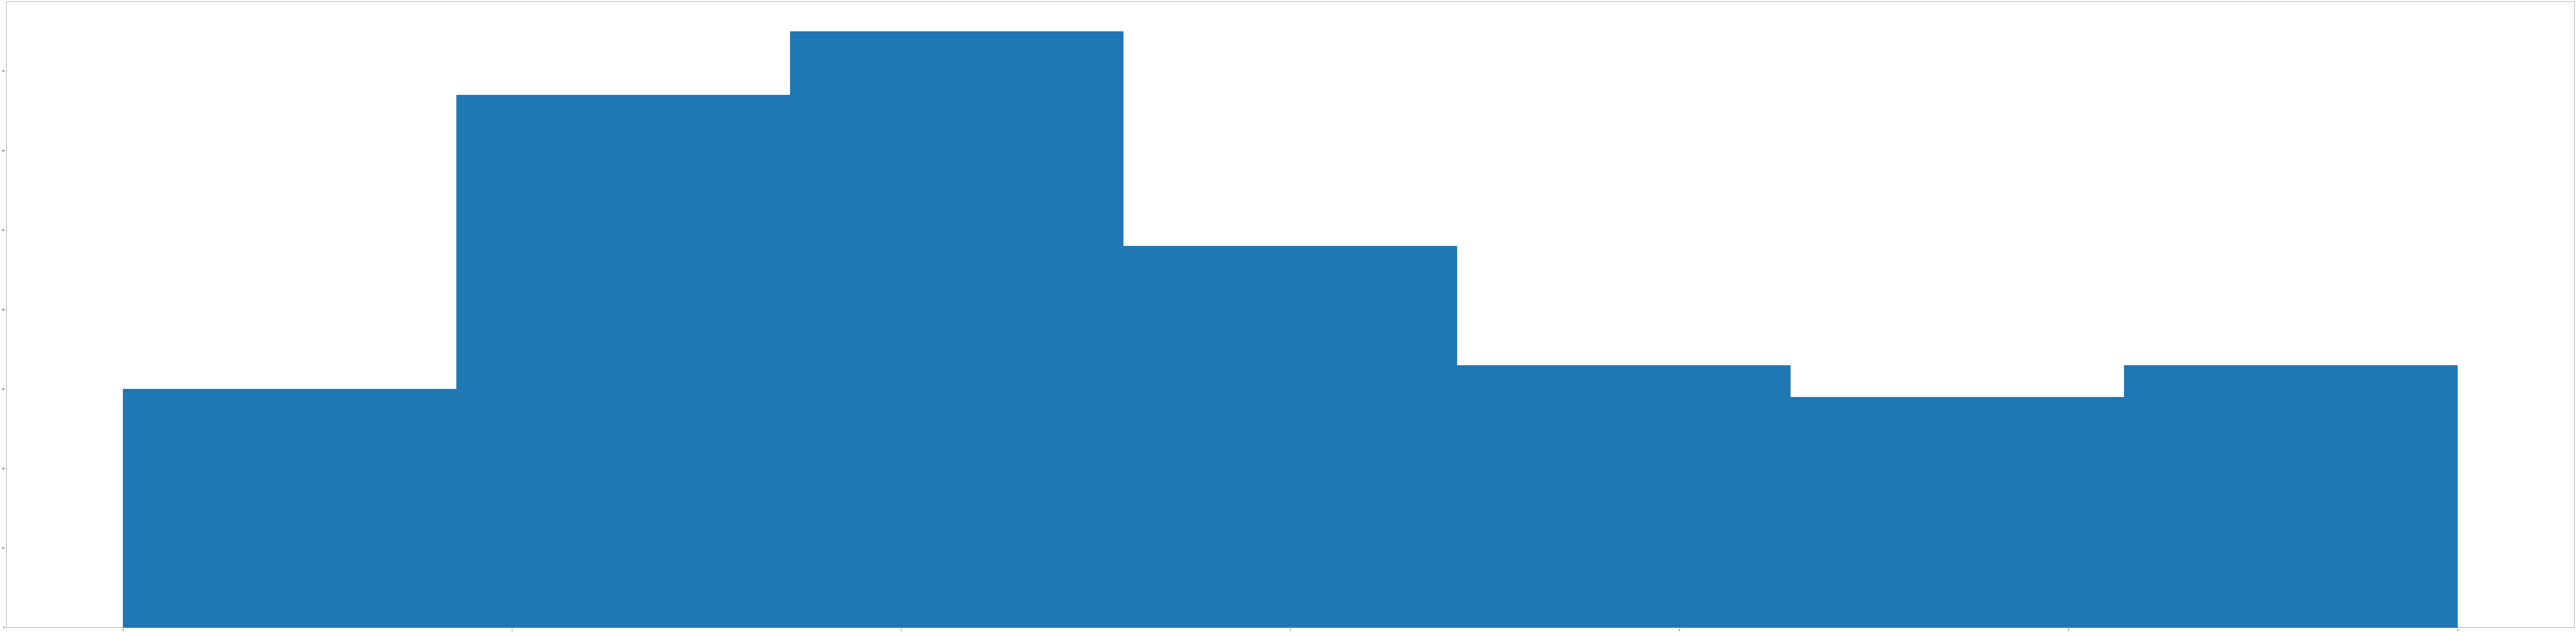

In [8]:
# so let's try something different:
ts_created_dayofweek = [d.weekday() for d in ts_created]
ts_created_dayofmonth = [d.day for d in ts_created]
ts_created_month = [d.month for d in ts_created]
# wow! a blob!
plt.hist(ts_created_dayofweek, bins=7)

In [9]:
def plot_a_range_of_values(list_of_values, n_bins, labels, zero_index=True):
    """
    Given a list of values (say, day of week or month of year) for a bunch of events,
    plots a histogram of their values, given by n_bins. 
    Ideally n_bins is the number of possible values found in our list of values.
    
    inputs:
    list_of_values: list of integer values (e.g. day of week or month of year) for a bunch of events. 
    n_bins: number of bins we are using. integer; should be the number of possible values in list_of_values.
    labels: the labels we want to see on our x-axis (names of days/months, days of a month). list of str or ints.
            if the string 'auto', we let matplotlib set its own labels.
    zero_index: if True (e.g. months, days of week), we assume our bins start at 0. 
                if False (e.g. day of month), our bins start at 1.
    """
    if labels == 'auto':
        plt.hist(list_of_values, bins=n_bins, rwidth=0.75, align='left')
    else:
        if zero_index:
            ticks_min = 0
            ticks_max = n_bins
            
        else:
            ticks_min = 1
            ticks_max = n_bins + 1
            
        plt.xticks(ticks=range(ticks_min, ticks_max), labels=labels)
        plt.hist(list_of_values, bins=range(ticks_min, ticks_max + 1), rwidth=0.75, align='left')


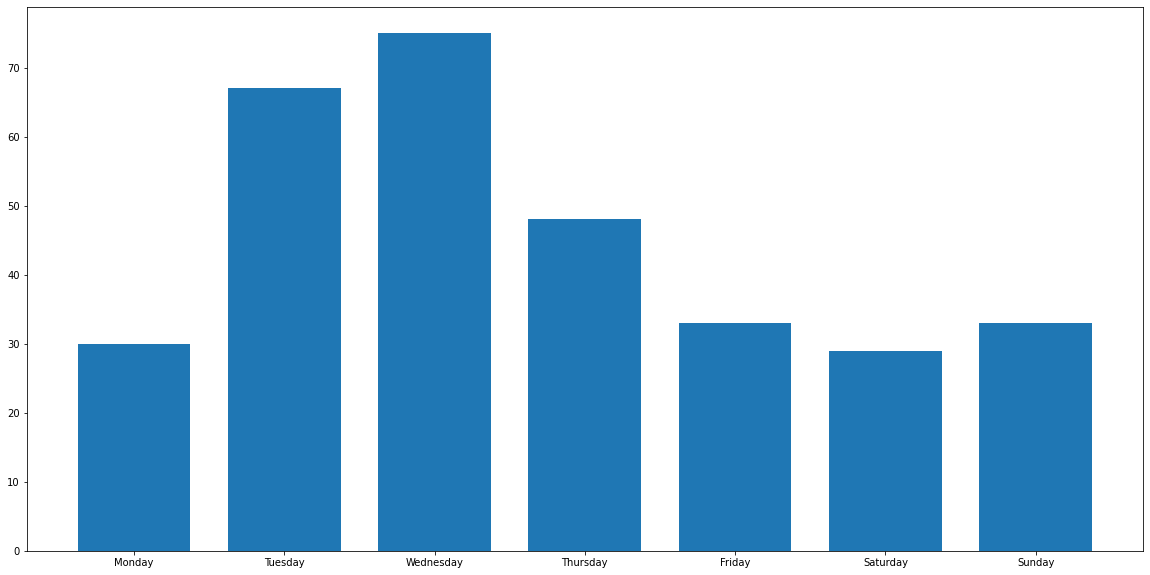

In [10]:
# let's do better - let's look at weekly posting patterns to start. 
plt.rcParams["figure.figsize"] = (20,10)

# does this look like what you expected? why or why not?
labels = [calendar.day_name[i] for i in range(7)]
plot_a_range_of_values(ts_created_dayofweek, 7, labels)


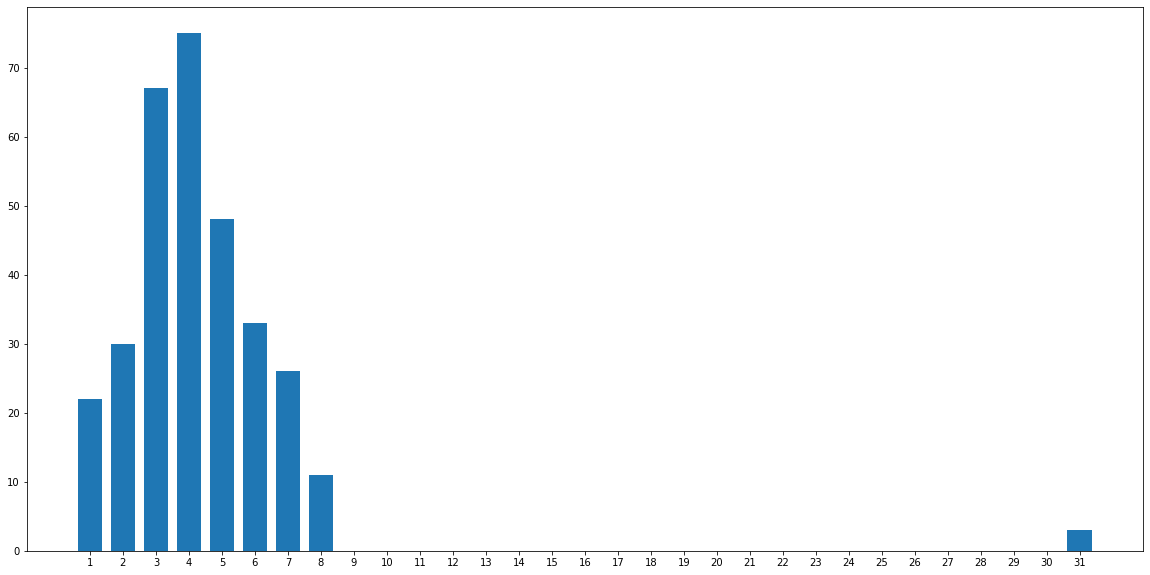

In [11]:
# ok, now let's look at day of month:
# does this look like what you expected? why or why not?
plot_a_range_of_values(ts_created_dayofmonth, 31, [r  for r in range(1, 32)], zero_index=False)

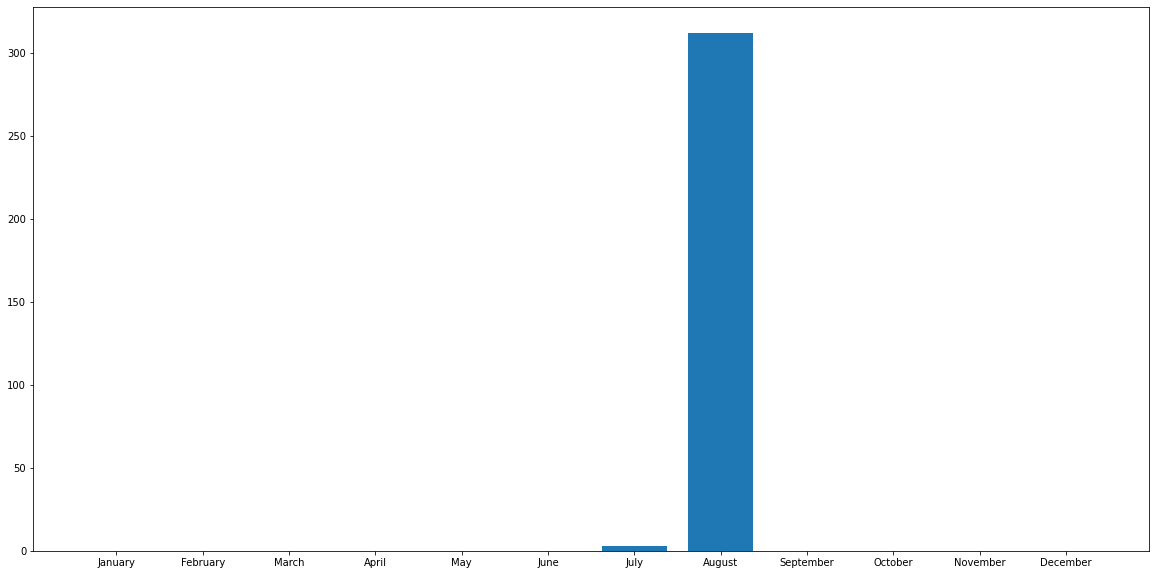

In [12]:
# and now month of year.
labels = [calendar.month_name[i] for i in range(1, 13)]
plot_a_range_of_values(ts_created_month, 12, labels, zero_index=False)

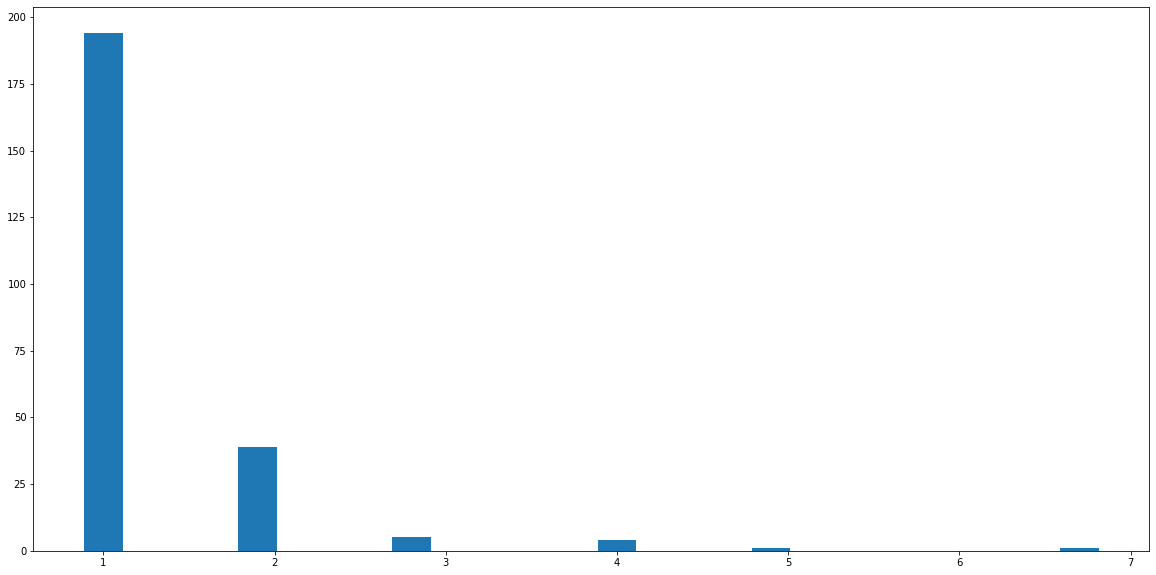

In [13]:
# so we have some time-based data. what else can we explore? 
# let's look at users - can we get the number of posts each user has made?

# collections.Counter will count the number of times each value appears in a list.
# this is super handy for figuring out how often someone shows up in a dataset, for example.
author_counts_by_name = collections.Counter(authors)

# is the subreddit dominated by a small set of posters, or does everyone post about the same amount?
author_post_count = author_counts_by_name.values()


# look! it's an old friend!
# this time we're not going to be predicting our own labels though!
plot_a_range_of_values(author_post_count, 20, labels='auto', zero_index=True)

# if your data is like my data, you're probably going to see a huge spike at 1, and not much else. 

Counter({1: 194, 2: 39, 3: 5, 4: 4, 5: 1, 7: 1})


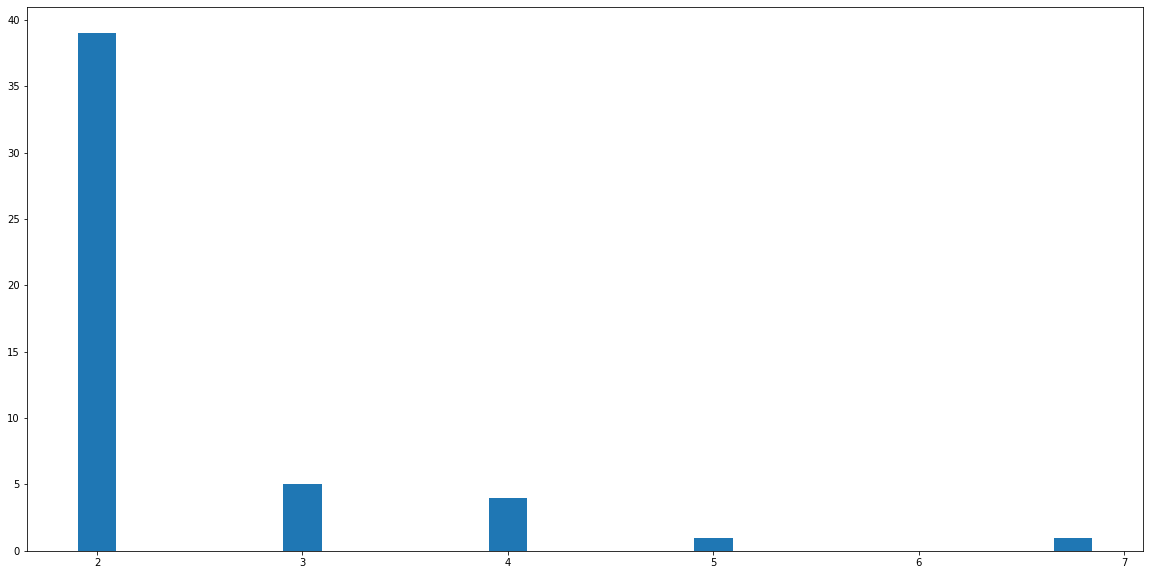

In [14]:
# let's figure out how to zoom in on the long tail.
plot_a_range_of_values([a for a in author_post_count if a > 1], 20, labels='auto', zero_index=True)

# or, even more simply:
print(collections.Counter(author_counts_by_name.values()))

# can you think of a better way to visualize your result?


In [15]:
# now for a little bit of natural language processing and pandas!
keyword = 'gme'

df = pd.DataFrame({'title': titles, 'texts': texts, 'ts': ts_created})


In [16]:
df.head(5)
# lil dataframe!!


,title,texts,ts
0,GME YOLO - I smell the money in August,[deleted],2021-08-07 19:02:08
1,How to use the $1T US Senate Infrastructure Bi...,Sup Retards\n\nI am here representing the high...,2021-08-07 19:08:12
2,Spotted in the wild—dentist in San Diego has a...,[deleted],2021-08-07 19:33:17
3,STARBUCKS SHORTAGE,[removed],2021-08-07 20:08:45
4,Reviewing the DD again before deciding to load...,,2021-08-07 20:32:35


In [18]:
# we want to make sure we can do keyword search fairly well! 
# keep in mind that searching like this might be slower for large datasets; 
# you may want to look into solutions like elasticsearch or parallel computing if your dataset is huge!

# lambda expressions are like little mini functions. 
# they're really handy when you want to do a function on a column and get a column back that aligns with your previous column.
df['combined_text_lowercase'] = df.apply(lambda x: x.title.lower() + x.texts.lower(), axis=1)
df['{}_present'.format(keyword)] = df['combined_text_lowercase'].apply(lambda x: keyword in x)

In [19]:
# wow, more columns!
df.head(5)


,title,texts,ts,combined_text_lowercase,gme_present
0,GME YOLO - I smell the money in August,[deleted],2021-08-07 19:02:08,gme yolo - i smell the money in august[deleted],True
1,How to use the $1T US Senate Infrastructure Bi...,Sup Retards\n\nI am here representing the high...,2021-08-07 19:08:12,how to use the $1t us senate infrastructure bi...,True
2,Spotted in the wild—dentist in San Diego has a...,[deleted],2021-08-07 19:33:17,spotted in the wild—dentist in san diego has a...,True
3,STARBUCKS SHORTAGE,[removed],2021-08-07 20:08:45,starbucks shortage[removed],False
4,Reviewing the DD again before deciding to load...,,2021-08-07 20:32:35,reviewing the dd again before deciding to load...,True


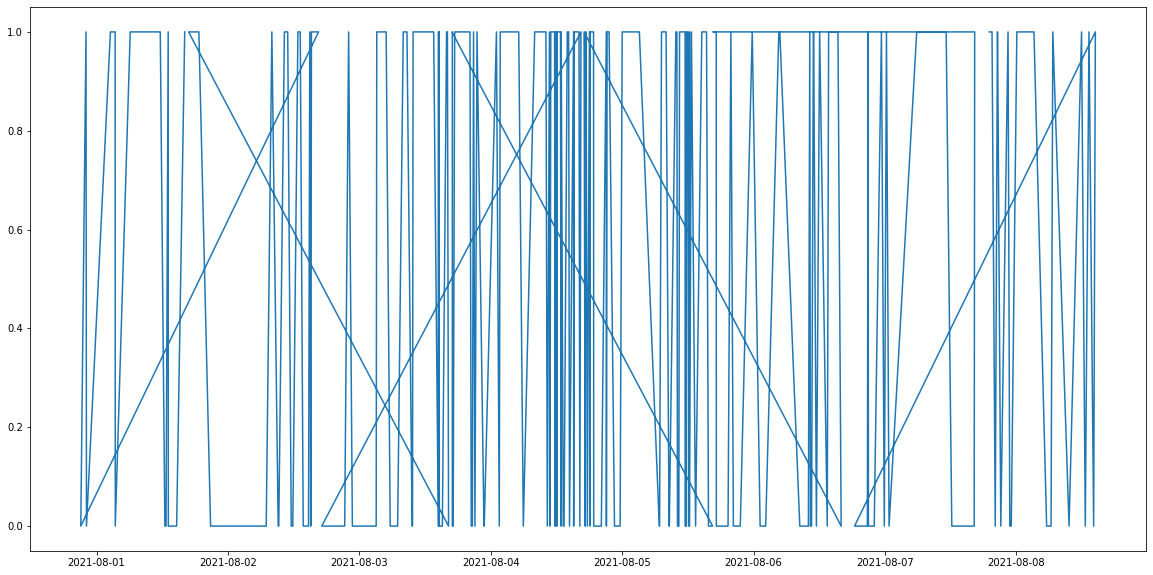

In [20]:
# let's try another small task: how often is your keyword mentioned over time?
# if we plot it right now, what will happen?

plt.plot(df['ts'], df['gme_present'])
# not quite what we wanted, right? 

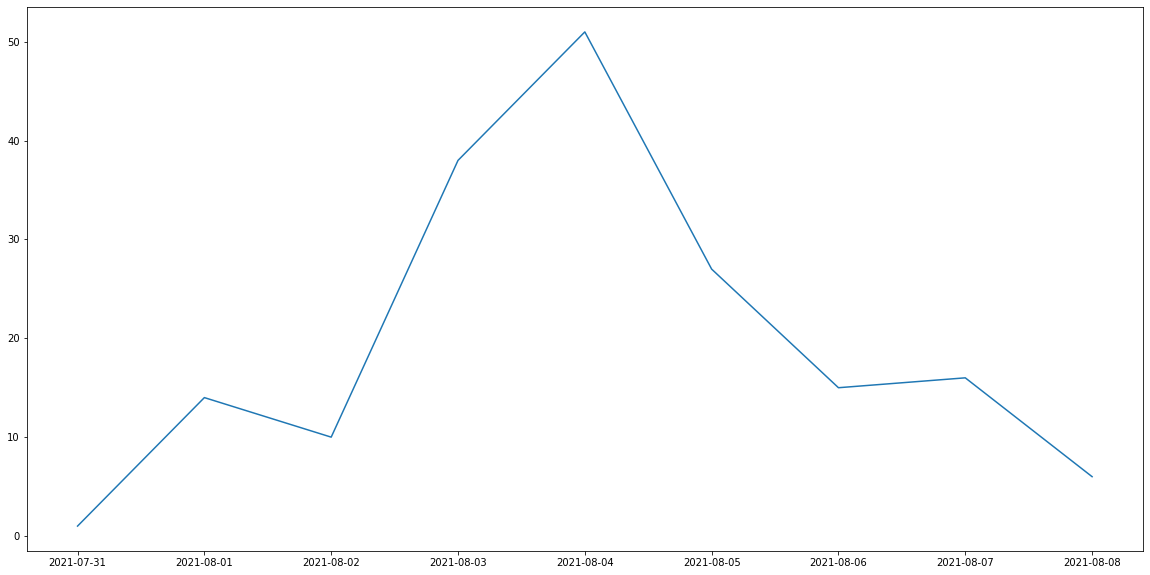

In [21]:
# let's group by day - that's a manageable grouping.
# first, let's round to the nearest day.
df['date_ts'] = df['ts'].apply(lambda b: b.date())

# now we need to group. 
grouped_by_date_ts = df.groupby('date_ts')


dates = []
num_keyword_mentions = []
for date_ts, gr in grouped_by_date_ts:
    num_keyword_mentions.append(gr['{}_present'.format(keyword)].sum())
    dates.append(date_ts)
    
plt.plot(dates, num_keyword_mentions)
# what does this tell us about trends in the subreddit? what happens if we superimpose two lines? 
# can you make a function that does all the stuff we just did?

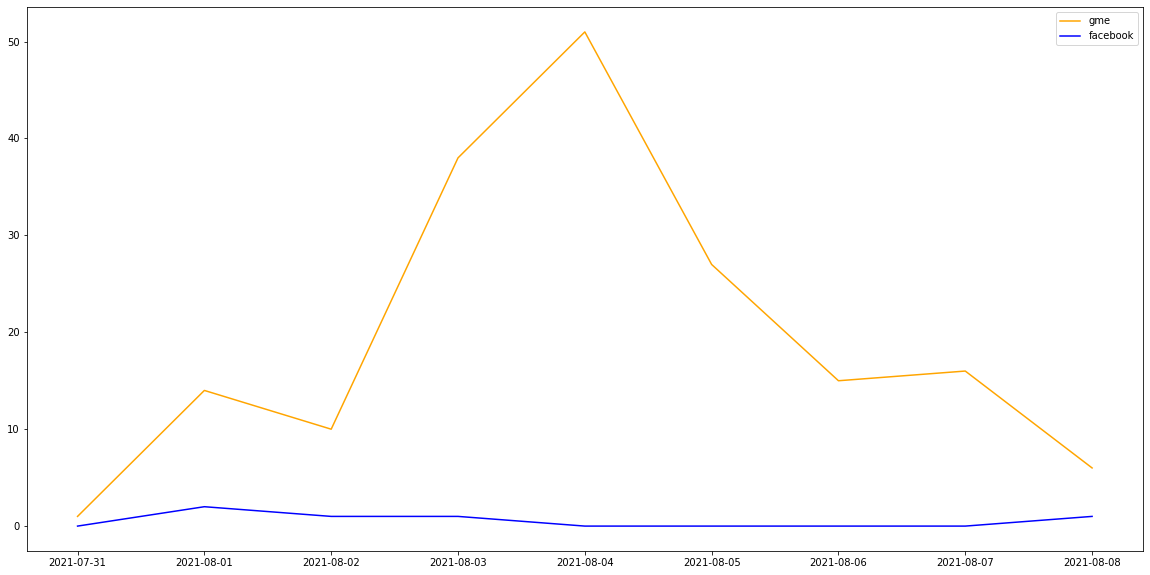

In [22]:
keyword2 = 'facebook'
df['{}_present'.format(keyword2)] = df['combined_text_lowercase'].apply(lambda x: keyword2 in x)

dates = []
num_keyword_mentions = []
num_keyword2_mentions = []

grouped_by_date_ts = df.groupby('date_ts')
for date_ts, gr in grouped_by_date_ts:
    num_keyword_mentions.append(gr['{}_present'.format(keyword)].sum())
    num_keyword2_mentions.append(gr['{}_present'.format(keyword2)].sum())
    dates.append(date_ts)
    
plt.plot(dates, num_keyword_mentions, color='orange', label='gme')
plt.plot(dates, num_keyword2_mentions, color='blue', label='facebook')
plt.legend()

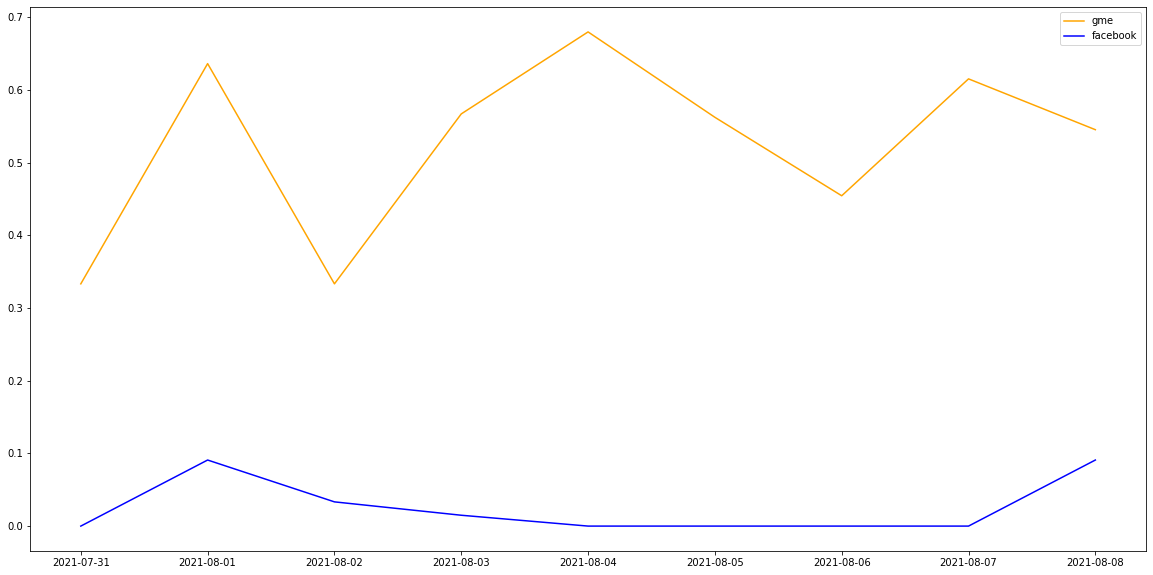

In [25]:
grouped_by_date_ts = df.groupby('date_ts')

# maybe traffic was just up on a day that you saw a spike - how can we remedy that?
# fraction of posts!
num_keyword_mentions_fractional = []
num_keyword2_mentions_fractional = []
dates = []
for date_ts, gr in grouped_by_date_ts:
    num_keyword_mentions_fractional.append(gr['{}_present'.format(keyword)].sum() / gr['{}_present'.format(keyword)].count())
    num_keyword2_mentions_fractional.append(gr['{}_present'.format(keyword2)].sum() / gr['{}_present'.format(keyword2)].count())
    dates.append(date_ts)
    
plt.plot(dates, num_keyword_mentions_fractional, color='orange', label='gme')
plt.plot(dates, num_keyword2_mentions_fractional, color='blue', label='facebook')
plt.legend()

In [26]:
# let's make another dataframe of authors & how many posts they made!
author_df = pd.DataFrame({'author': author_counts_by_name.keys(), 'post_counts': author_counts_by_name.values()})
print(author_df.head(5))
df['author'] = authors
df['author'] = df['author'].astype('str')
author_df['author'] = author_df['author'].astype('str')
print(df.head(5))

# now what happens if we join this to our existing dataframe?
df_merged = df.merge(author_df, how='left', on='author')

                 author  post_counts
0            xHeavyRain            1
1     RetardedHedgeFund            1
2  ZisforZillahwhodrank            1
3      Real_Signal_6550            1
4            DrStemSell            1
                                               title  \
0             GME YOLO - I smell the money in August   
1  How to use the $1T US Senate Infrastructure Bi...   
2  Spotted in the wild—dentist in San Diego has a...   
3                                 STARBUCKS SHORTAGE   
4  Reviewing the DD again before deciding to load...   

                                               texts                  ts  \
0                                          [deleted] 2021-08-07 19:02:08   
1  Sup Retards\n\nI am here representing the high... 2021-08-07 19:08:12   
2                                          [deleted] 2021-08-07 19:33:17   
3                                          [removed] 2021-08-07 20:08:45   
4                                                    2021-08-

In [27]:
df_merged['post_counts'].value_counts()
# what kind of user makes up most of the posts?

1    194
2     78
4     16
3     15
7      7
5      5
Name: post_counts, dtype: int64

In [ ]:
# what else do you want to know about your data?